In [55]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [56]:
mnist = tf.keras.datasets.mnist
(x_train , y_train) , (x_test,y_test) = mnist.load_data()

In [57]:
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [59]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [60]:
model.fit(x_train,y_train, epochs=5)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2654 - accuracy: 0.9223
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1074 - accuracy: 0.9671
Epoch 3/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0735 - accuracy: 0.9773
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9830
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9867
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0311 - accuracy: 0.9899
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0251 - accuracy: 0.9910
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - accuracy: 0.9925
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9943
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

In [61]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1772 - accuracy: 0.9756


In [62]:
print(loss)
print(accuracy)

0.17719361186027527
0.975600004196167


1/1 [==============================] - 0s 68ms/step
This digit is probably a 3


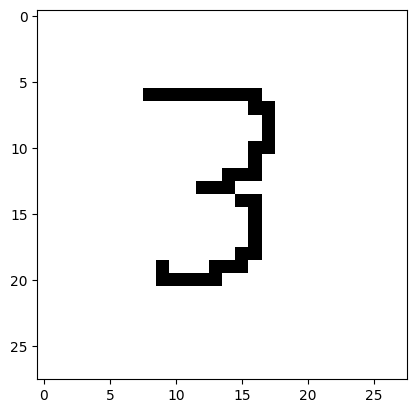

1/1 [==============================] - 0s 47ms/step
This digit is probably a 2


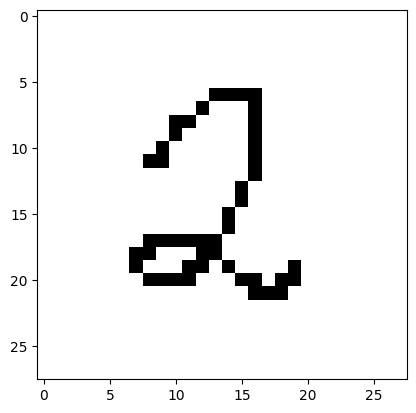

1/1 [==============================] - 0s 31ms/step
This digit is probably a 1


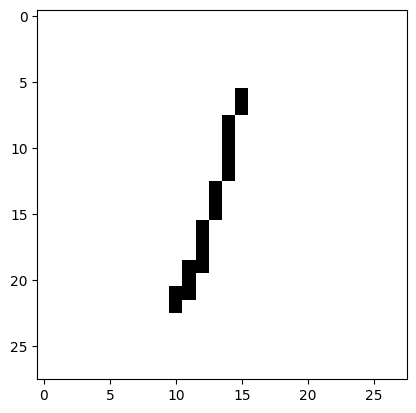

1/1 [==============================] - 0s 37ms/step
This digit is probably a 0


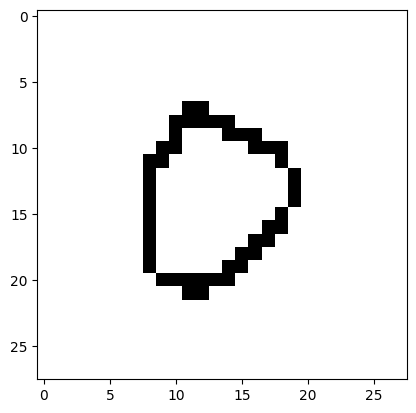

1/1 [==============================] - 0s 20ms/step
This digit is probably a 1


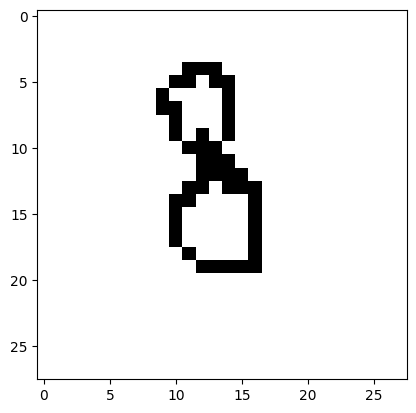

1/1 [==============================] - 0s 20ms/step
This digit is probably a 7


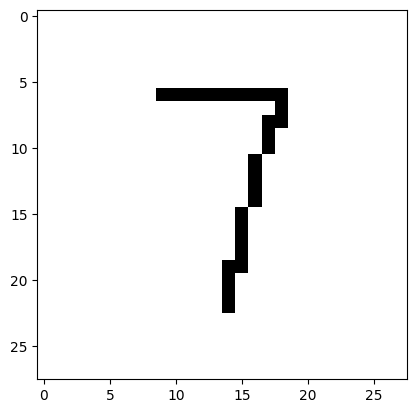

In [67]:
image_number = 13
while os.path.isfile(f"/content/digit{image_number}.png"):

  img = cv2.imread(f"/content/digit{image_number}.png")[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f"This digit is probably a {np.argmax(prediction)}")
  plt.imshow(img[0] , cmap = plt.cm.binary)
  plt.show()
  image_number +=1

# New section